### This example shows how to use read/write functions for <ul>
<li>Input </li>
<li>Grid </li>
<li>Mask </li>
<li>Dep </li>
<li>Forcing </li>
</ul>

In [87]:
# for first run install package
# pip install -e ..

In [88]:
import os
import sys
from hydromt_sfincs import SfincsModel

### Input

In [89]:
# initialize
model_root = "sfincs_coastal"
sf = SfincsModel(root=model_root, mode="r+")  # append mode

# read inp
sf.read_config()
sf.config

{'mmax': 425,
 'nmax': 272,
 'dx': 150.0,
 'dy': 150.0,
 'x0': 268650.0,
 'y0': 5018550.0,
 'rotation': 0,
 'epsg': 32633,
 'tref': datetime.datetime(2010, 2, 1, 0, 0),
 'tstart': datetime.datetime(2010, 2, 1, 0, 0),
 'tstop': datetime.datetime(2010, 2, 10, 0, 0),
 'dtout': 3600,
 'dthisout': 600,
 'dtmaxout': 86400,
 'alpha': 0.5,
 'theta': 0.9,
 'huthresh': 0.05,
 'zsini': 0.5,
 'advection': 0,
 'depfile': 'sfincs.dep',
 'mskfile': 'sfincs.msk',
 'indexfile': 'sfincs.ind',
 'bndfile': 'sfincs.bnd',
 'bzsfile': 'sfincs.bzs',
 'precipfile': 'sfincs.precip',
 'manningfile': 'sfincs.man',
 'scsfile': 'sfincs.scs',
 'inputformat': 'bin',
 'outputformat': 'net',
 'min_lev_hmax': -1}

In [90]:
# eventually change input and write again
sf.set_config("zsini", 0.0)
sf.write_config("sfincs_v2.inp")

### Grid

In [91]:
# grid is automatically read in from sfincs.inp
reggrid = sf.reggrid
reggrid.__dict__

{'x0': 268650.0,
 'y0': 5018550.0,
 'dx': 150.0,
 'dy': 150.0,
 'nmax': 272,
 'mmax': 425,
 'rotation': 0,
 'crs': <Derived Projected CRS: EPSG:32633>
 Name: WGS 84 / UTM zone 33N
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
 - bounds: (12.0, 0.0, 18.0, 84.0)
 Coordinate Operation:
 - name: UTM zone 33N
 - method: Transverse Mercator
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 'subgrid': <hydromt_sfincs.subgrid.SubgridTableRegular at 0x1ebdbfdf400>}

Compare different defenitions of grid

In [92]:
# #Compare with previous definition of grid
# import math
# import numpy as np

# #old defenitions
# cosrot = math.cos(inp.rotation * math.pi / 180)
# sinrot = math.sin(inp.rotation * math.pi / 180)

# xx = np.linspace(
#     0.5 * inp.dx, inp.mmax * inp.dx - 0.5 * inp.dx, num=inp.mmax
# )
# yy = np.linspace(
#     0.5 * inp.dy, inp.nmax * inp.dy - 0.5 * inp.dy, num=inp.nmax
# )

# xg0, yg0 = np.meshgrid(xx, yy)
# xg = inp.x0 + xg0 * cosrot - yg0 * sinrot
# yg = inp.y0 + xg0 * sinrot + yg0 * cosrot

# #new defenitions
# x = grid.coordinates["x"]
# y = grid.coordinates["y"]

# xn,yn = np.meshgrid(x,y)

# #differences
# print(sum(sum(xg-xn)))
# print(sum(sum(yg-yn)))

### Mask

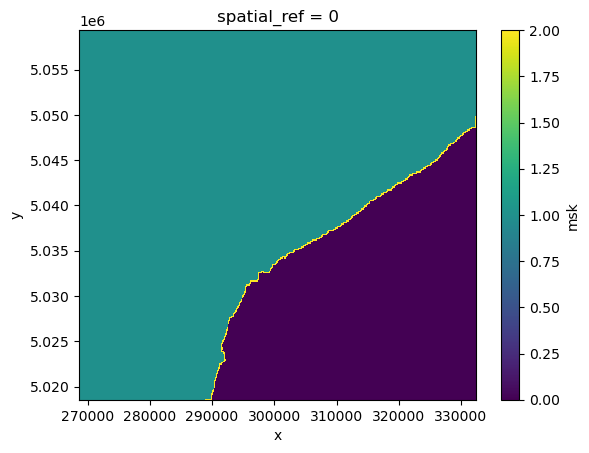

In [93]:
# read maska

sf.read_grid(data_vars=["msk"])
# sf.read_grid()  #read all maps
sf.mask.plot.imshow()

In [94]:
# write
sf.config.update(indexfile="sfincs_v2.ind", mskfile="sfincs_v2.msk")
sf.write_grid(data_vars=["msk"])  # index file is always written
# sf.write_grid()  # write all maps in sf.grid dataset
os.path.isfile(os.path.join(model_root, "sfincs_v2.msk"))

True

### Dep and Manning

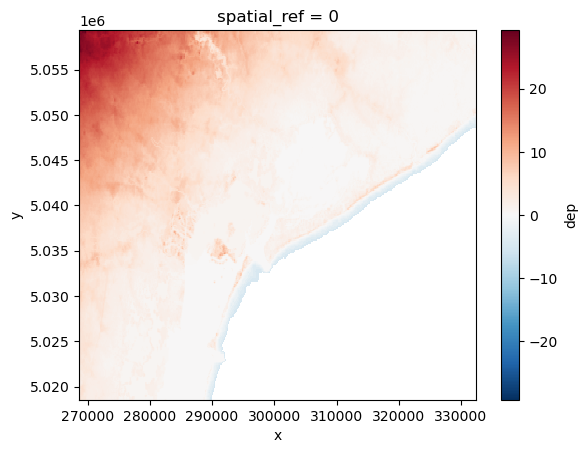

In [95]:
sf.read_grid(["dep"])
sf.grid["dep"].raster.mask_nodata().plot.imshow()

In [96]:
# change depth and write away
import xarray as xr

sf.grid["dep"] = xr.where(
    sf.grid["dep"] != sf.grid["dep"].raster.nodata, sf.grid["dep"] + 10, -9999
)
sf.grid["dep"].raster.set_nodata(-9999)
sf.config.update(
    depfile="sfincs_v2.dep",
)
sf.write_grid(["dep"])

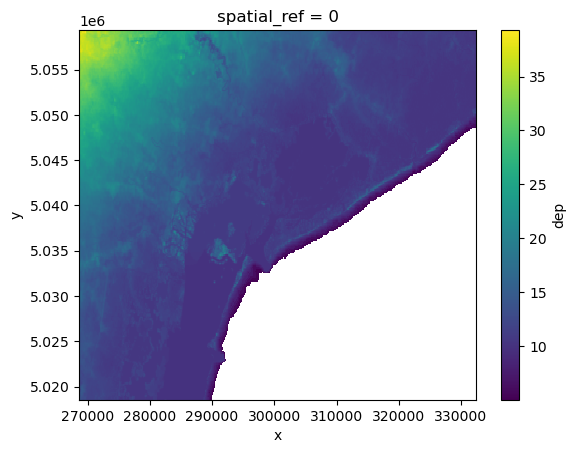

In [97]:
# read again and plot
# NOTE now we read sfincs_v2.dep
sf.read_grid("dep")
sf.grid["dep"].raster.mask_nodata().plot.imshow()

In [98]:
# FIXME file is called sfincs.manning
# man = sf.read_grid("manning")
# sf.grid["manning"].raster.mask_nodata().plot.imshow()

### Forcing

In [99]:
sf.read_forcing(["waterlevel"])

In [100]:
# boundary points and time_series combined
sf.forcing["bzs"]

# change water level in first station
sf.forcing["bzs"][0] += 0.5


In [101]:
sf.forcing["bzs"]

<xarray.DataArray 'bzs' (index: 6, time: 217)>
array([[1.04, 0.88, 0.71, ..., 0.88, 0.85, 0.85],
       [0.54, 0.38, 0.21, ..., 0.38, 0.35, 0.35],
       [0.53, 0.37, 0.2 , ..., 0.38, 0.35, 0.34],
       [0.53, 0.36, 0.2 , ..., 0.37, 0.35, 0.34],
       [0.52, 0.36, 0.19, ..., 0.37, 0.34, 0.33],
       [0.52, 0.36, 0.19, ..., 0.37, 0.34, 0.33]])
Coordinates:
  * index        (index) int64 1 2 3 4 5 6
    geometry     (index) object POINT (291821.42 5027884.99) ... POINT (33143...
  * time         (time) datetime64[ns] 2010-02-01 ... 2010-02-10
    spatial_ref  int32 0

In [102]:
#read time series
time = sf.forcing["bzs"].coords["time"] 


In [103]:
# convert coordinates from xarray to gdf
gdf = sf.forcing["bzs"].vector.to_gdf()

(<Figure size 600x300 with 1 Axes>,
 [<AxesSubplot: title={'center': 'SFINCS waterlevel forcing (bzs)'}, ylabel='waterlevel\n[m+ref]'>])

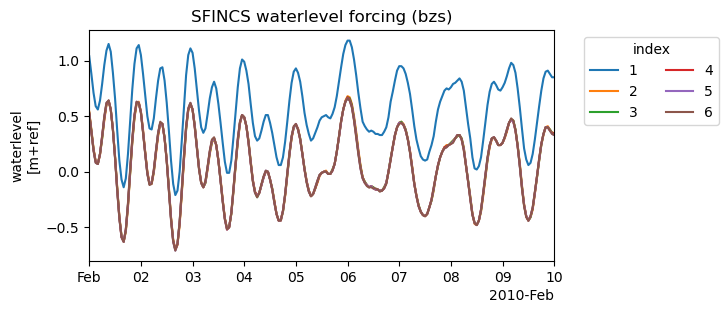

In [104]:
# boundary timeseries
sf.plot_forcing()

(<Figure size 600x300 with 1 Axes>,
 [<AxesSubplot: title={'center': 'SFINCS waterlevel forcing (bzs)'}, ylabel='waterlevel\n[m+ref]'>])

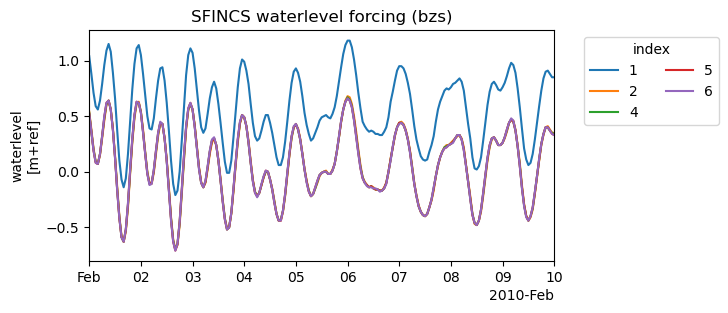

In [105]:
#drop point 3 and plot again
sf.forcing["bzs"] = sf.forcing["bzs"].drop_sel(index=3)
sf.plot_forcing("bzs")

(<Figure size 600x600 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'SFINCS waterlevel forcing (bzs)'}, ylabel='waterlevel\n[m+ref]'>,
        <AxesSubplot: title={'center': 'SFINCS precipitation forcing (precip)'}, ylabel='precipitation\n[mm.hr-1]'>],
       dtype=object))

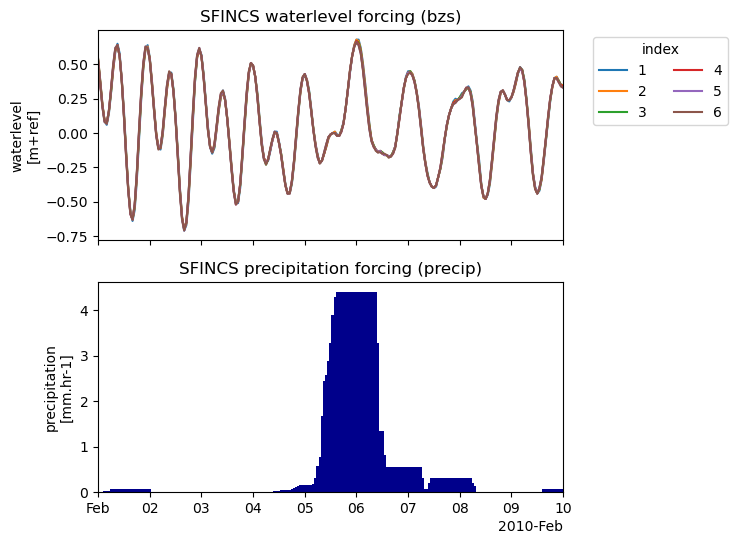

In [106]:
# you can also read and plot all available forcing with
# NOTE this reads in bzs forcing again (so changes are lost)
sf.read_forcing()
sf.plot_forcing()